<a href="https://colab.research.google.com/github/Flychuban/Image-Classifier-Deep-Learning/blob/main/ImageClassifierDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import os

In [2]:
# Avoid OOM error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = os.path.join('drive', 'MyDrive', 'ImageClassifierDeepLearning', 'data')
print(data_dir)
print('/content/drive/MyDrive/ImageClassifierDeepLearning/data')

drive/MyDrive/ImageClassifierDeepLearning/data
/content/drive/MyDrive/ImageClassifierDeepLearning/data


In [5]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [6]:
# Remove corrupted images
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print(f"Image not in ext list {image_path}")
        os.remove(image_path)
    except Exception as e:
      print(f"Issue with image {image_path}")

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# Building data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 177 files belonging to 2 classes.


In [9]:
# Converting data from generatoe to iterator
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

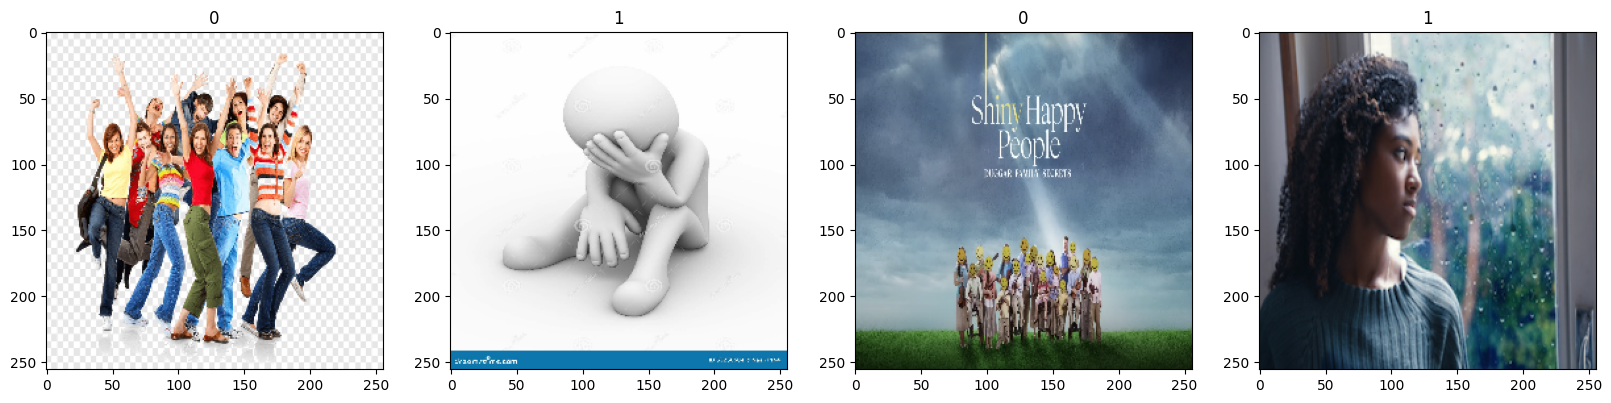

In [11]:
# Checking image labels
# 0-Happy 1-Sad
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [12]:
# Scale data from 0 to 1 for better model
data = data.map(lambda x, y: (x/255, y))

In [13]:
scaled_iterator = data.as_numpy_iterator()

In [14]:
batch = scaled_iterator.next()

In [15]:
batch[0]

array([[[[5.37254930e-01, 6.54901981e-01, 7.56862760e-01],
         [5.37254930e-01, 6.54901981e-01, 7.56862760e-01],
         [5.37254930e-01, 6.54901981e-01, 7.56862760e-01],
         ...,
         [4.48043048e-01, 2.70262718e-01, 1.54250920e-01],
         [4.90196079e-01, 2.96078444e-01, 1.62745103e-01],
         [5.34643054e-01, 3.26799929e-01, 1.66015625e-01]],

        [[5.39208055e-01, 6.56855106e-01, 7.58815885e-01],
         [5.39208055e-01, 6.56855106e-01, 7.58815885e-01],
         [5.39208055e-01, 6.56855106e-01, 7.58815885e-01],
         ...,
         [4.28435206e-01, 2.61768550e-01, 1.53925404e-01],
         [4.88242954e-01, 2.94125319e-01, 1.60791978e-01],
         [5.27450979e-01, 3.19607854e-01, 1.58823535e-01]],

        [[5.41176498e-01, 6.58823550e-01, 7.60784328e-01],
         [5.41176498e-01, 6.58823550e-01, 7.60784328e-01],
         [5.41176498e-01, 6.58823550e-01, 7.60784328e-01],
         ...,
         [4.00666356e-01, 2.49019608e-01, 1.47058830e-01],
         [

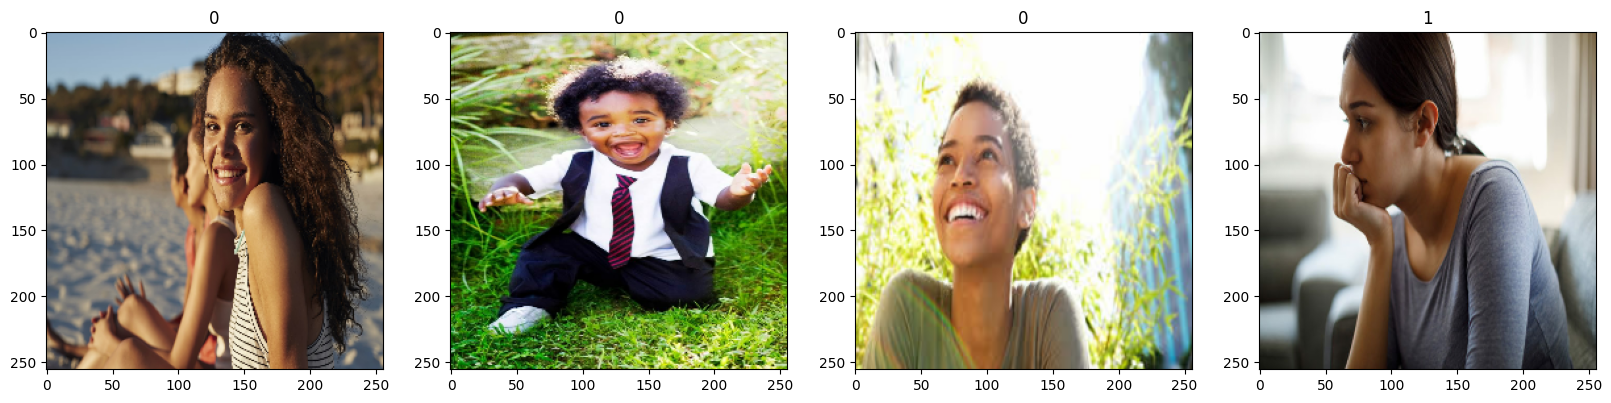

In [16]:
# Checking image labels
# 0-Happy 1-Sad
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(float))
  ax[idx].title.set_text(batch[1][idx])

In [17]:
# Spliting data

train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [30]:
# First conv layer
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# Second conv layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third conv layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      